# Chess Opening Recomendation System

# 1. Importing the dataset 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

chess_data = pd.read_csv('chess_data.csv')

In [3]:
chess_data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.500000e+12,1.500000e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.500000e+12,1.500000e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.500000e+12,1.500000e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.500000e+12,1.500000e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.500000e+12,1.500000e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
chess_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [5]:
chess_data.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483208e+12,1.483208e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.831972e+10,2.831967e+10,33.570585,291.253376,291.036126,2.797152
min,1.376770e+12,1.376770e+12,1.000000,784.000000,789.000000,1.000000
25%,1.479640e+12,1.479642e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.497030e+12,1.497030e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.500708e+12,1.500708e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504490e+12,1.504490e+12,349.000000,2700.000000,2723.000000,28.000000


# Finding Top 10 popular opennings

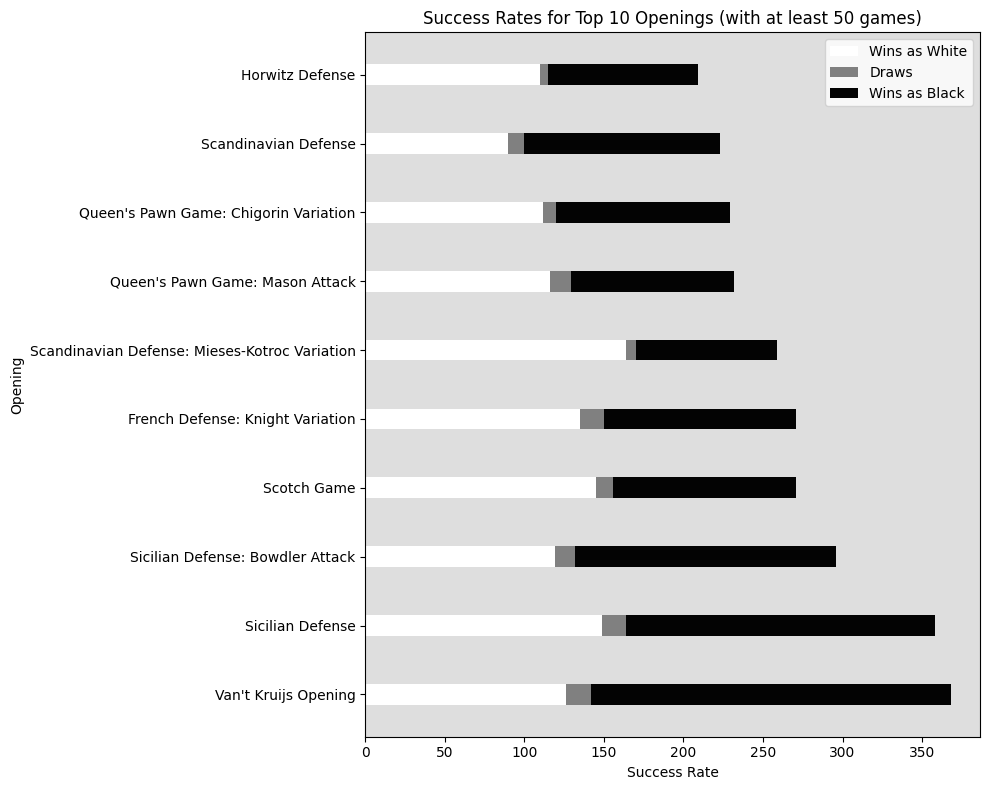

In [6]:


def plot_success_rates_for_top_10_openings(min_games=10):
    # Count wins and total games for each opening
    wins = chess_data[chess_data['winner'] != 'draw'].groupby('opening_name').size()
    total_games = chess_data.groupby('opening_name').size()
    
    # Calculate success rates for black, white, and draw outcomes for each opening
    success_rates = pd.DataFrame(index=wins.index)
    success_rates['Total Games'] = total_games
    success_rates['Wins as White'] = chess_data[chess_data['winner'] == 'white'].groupby('opening_name').size()
    success_rates['Wins as Black'] = chess_data[chess_data['winner'] == 'black'].groupby('opening_name').size()

    success_rates['Draws'] = total_games - success_rates['Wins as White'] - success_rates['Wins as Black']
    success_rates['Draws'] = success_rates['Draws'].fillna(0)

    # Filter out openings with fewer than min_games played
    success_rates = success_rates[success_rates['Total Games'] >= min_games]

    # Sort by total games
    success_rates = success_rates.sort_values(by='Total Games', ascending=False).head(10)
    
    # Calculate the bottom position for draw bars
    bottom_draws = success_rates['Wins as White'].values
    
    # Plot horizontal bar graph with custom colors
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.set_facecolor('#dedede')  # Set graph background color
    
    bar_height = 0.3  # Fixed bar height
    ax.barh(success_rates.index, success_rates['Wins as White'], color='white', label='Wins as White', height=bar_height)
    ax.barh(success_rates.index, success_rates['Draws'], color='#808080', label='Draws', height=bar_height, left=success_rates['Wins as White'])
    ax.barh(success_rates.index, success_rates['Wins as Black'], color='#030303', label='Wins as Black', height=bar_height, left=bottom_draws + success_rates['Draws'])
    
    ax.set_title('Success Rates for Top 10 Openings (with at least {} games)'.format(min_games))
    ax.set_xlabel('Success Rate')
    ax.set_ylabel('Opening')
    
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage:
plot_success_rates_for_top_10_openings(min_games=50)  # Adjust the minimum games threshold as needed


# First model- using KNN 

This model is using a method called **K-Nearest Neighbors (KNN)** to recommend the best chess opening for a specific player. Here's how it works:

1. **Data Preparation**: The model first loads a dataset of chess games and filters it to only include games played by a specific player. It then selects certain features from the data, such as the ratings of the white and black players, the number of moves in the opening, and the total number of turns in the game.

2. **Label Encoding**: The model converts the 'opening_eco' (which is a code for the type of opening used in the game) into numerical labels. This is because the KNN algorithm can only work with numerical data.

3. **Standardization**: The features are then standardized to have a mean of 0 and a variance of 1. This is done to ensure that all features contribute equally to the distance calculation in the KNN algorithm.

4. **KNN Classifier**: A KNN classifier is created. This is a type of machine learning model that makes predictions based on the 'K' most similar instances in the training data.

5. **Hyperparameter Tuning**: The model uses a method called Grid Search with Cross-Validation to find the best hyperparameters for the KNN classifier. Hyperparameters are settings in the model that can be adjusted to optimize performance.

6. **Training**: The KNN classifier is then trained using the best hyperparameters found in the previous step.

7. **Prediction**: The trained model is used to predict the opening for all games in the dataset.

8. **Recommendation**: The model then finds the most frequently predicted opening and recommends it to the player.

So, in simple terms, this model is looking at the player's past games, finding similar games in the dataset, and recommending the most common opening used in those similar games. It's like asking, "What opening do players similar to me tend to use?" and then recommending that opening.



1. `from sklearn.model_selection import train_test_split, StratifiedKFold`: This line is importing two functions from the `sklearn.model_selection` module. `train_test_split` is used to split the dataset into training and testing sets. `StratifiedKFold` is a type of cross-validation strategy where the folds are made by preserving the percentage of samples for each class.

2. `from sklearn.preprocessing import LabelEncoder, StandardScaler`: This line is importing two classes from the `sklearn.preprocessing` module. `LabelEncoder` is used to convert categorical labels into numerical labels. `StandardScaler` is used to standardize features by removing the mean and scaling to unit variance.

3. `from sklearn.neighbors import KNeighborsClassifier`: This line is importing the `KNeighborsClassifier` class from the `sklearn.neighbors` module. This class is used to implement the K-Nearest Neighbors algorithm.

4. `from sklearn.metrics import classification_report`: This line is importing the `classification_report` function from the `sklearn.metrics` module. This function builds a text report showing the main classification metrics.

5. `from sklearn.model_selection import GridSearchCV`: This line is importing the `GridSearchCV` class from the `sklearn.model_selection` module. This class is used to perform hyperparameter tuning.

6. `from statistics import mode`: This line is importing the `mode` function from the `statistics` module. This function returns the most common data point from a dataset.

7. `import pandas as pd`: This line is importing the `pandas` library and giving it the alias `pd`. `pandas` is used for data manipulation and analysis.

8. `import numpy as np`: This line is importing the `numpy` library and giving it the alias `np`. `numpy` is used for numerical computations.


In [52]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from statistics import mode
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('chess_data.csv')

# Filter data for the player
player_id = 'oldpaths'
df = df[(df['white_id'] == player_id) | (df['black_id'] == player_id)]

# Select features
features = ['white_rating', 'black_rating', 'opening_ply', 'turns']
X = df[features]

# Convert 'opening_eco' to numerical labels
le = LabelEncoder()
y = le.fit_transform(df['opening_eco'])

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a mapping from opening_eco to opening_name
eco_to_name = df.set_index('opening_eco')['opening_name'].drop_duplicates().to_dict()

# Create KNN Classifier
knn = KNeighborsClassifier()

# Define a grid of hyperparameters
param_grid = {'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# Use stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)

# Use grid search with cross-validation to find the best hyperparameters
grid = GridSearchCV(knn, param_grid, cv=cv)
grid.fit(X, y)

# Print the best hyperparameters
print("Best Hyperparameters:", grid.best_params_)

# Train the model using the best hyperparameters
knn_best = KNeighborsClassifier(**grid.best_params_)
knn_best.fit(X, y)

# Predict the response for all games
y_pred = knn_best.predict(X)

# Convert the predicted labels back to the original opening names
opening_eco_pred = le.inverse_transform(y_pred)

# Convert the predicted opening_eco codes to opening_name
try:
    opening_names_pred = [eco_to_name[eco] for eco in opening_eco_pred]
    print("Most recommended opening:", mode(opening_names_pred))
except KeyError as e:
    print(f"KeyError: {e} is not found in the eco_to_name dictionary.")


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Most recommended opening: French Defense: La Bourdonnais Variation


# Second model- using Cosine Similarity (Personalised model)

This model is using a method called **Cosine Similarity** to recommend the best chess opening for a specific player. Here's how it works:

1. **Data Preparation**: The model first loads a dataset of chess games and filters it to only include games where the opening move is known. It then creates a pivot table with players as rows and openings as columns.

2. **Cosine Similarity**: The model computes a cosine similarity matrix. This matrix measures the cosine of the angle between two vectors, which in this case are the rows (players) in the pivot table. The closer the cosine value to 1, the more similar the players are in terms of their opening choices.

3. **Performance Calculation**: The model defines a function to calculate the performance of each player in each game. It then applies this function to the dataframe and normalizes the performance scores.

4. **Recommendation**: The model defines a function to recommend openings. This function gets the similarity scores for the player, sorts the players by similarity score, gets the top similar player, and then gets the openings that the player hasn't played yet. It then calculates the performance of each opening for the player and the similar players, calculates the average performance, considers the popularity of the opening, and calculates a final score for each opening. The openings are then sorted by final score and the top n openings are returned.

So, in simple terms, this model is looking at the player's past games, finding similar players in terms of opening choices, and recommending the openings that have performed well for both the player and the similar players. It's like asking, "What openings do players similar to me use and perform well with?" and then recommending those openings.

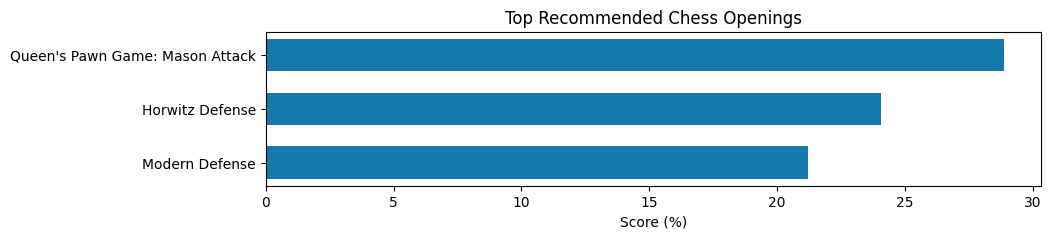

opening_name
Queen's Pawn Game: Mason Attack    28.874154
Horwitz Defense                    24.083991
Modern Defense                     21.212040
dtype: float64


In [11]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

# Load the data
df = pd.read_csv('chess_data.csv')

# Filter the data for games where the opening move is known
df = df[df['opening_name'].notna()]

# Create a pivot table with players as rows and openings as columns
pivot_table = df.pivot_table(index='white_id', columns='opening_name', values='white_rating', aggfunc='count', fill_value=0)

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(pivot_table)

# Convert the similarity matrix to a DataFrame
similarity_df = pd.DataFrame(similarity_matrix, index=pivot_table.index, columns=pivot_table.index)

# Define a function to calculate performance
def calculate_performance(row):
    if row['winner'] == 'white':
        return row['white_rating'] - row['black_rating']
    else:
        return row['black_rating'] - row['white_rating']

# Apply the function to the dataframe
df['performance'] = df.apply(calculate_performance, axis=1)

# Normalize the performance scores
scaler = MinMaxScaler()
df['performance'] = scaler.fit_transform(df[['performance']])

def recommend_openings(player_id, top_n=3):
    # Get the similarity scores for the player
    similarity_scores = similarity_df[player_id]
    
    # Sort the players by similarity score
    sorted_players = similarity_scores.sort_values(ascending=False)
    
    # Get the top similar player
    top_player_id = sorted_players.index[1]
    
    # Get the openings played by the top player
    top_player_openings = pivot_table.loc[top_player_id]
    
    # Get the openings that the player hasn't played yet
    player_openings = pivot_table.loc[player_id]
    new_openings = top_player_openings[player_openings == 0]
    
    # Calculate the performance of each opening for the player
    player_performance = df[df['white_id'] == player_id].groupby('opening_name')['performance'].mean()
    
    # Calculate the performance of each opening for similar players
    similar_players_performance = df[df['white_id'] == top_player_id].groupby('opening_name')['performance'].mean()
    
    # Calculate the average performance
    average_performance = (player_performance + similar_players_performance) / 2
    
    # Consider the popularity of the opening
    opening_popularity = df['opening_name'].value_counts() / len(df)
    
    # Calculate the final score for each opening
    final_score = average_performance * opening_popularity
    
    # Normalize the final scores to get percentages
    final_score = final_score / final_score.sum() * 100
    
    # Sort by final score and get the top n openings
    top_openings = final_score.sort_values(ascending=False).head(top_n)
    
    # Plot the top openings
    plt.figure(figsize=(10, 2))
    plt.barh(top_openings.index, top_openings.values, color='#1679AB', height = .6)
    plt.xlabel('Score (%)')
    plt.title('Top Recommended Chess Openings')
    plt.gca().invert_yaxis()
    plt.show()
    
    return top_openings

# Test the recommendation system
print(recommend_openings('oldpaths'))


# Finding Outliers or Cheaters using Isolation Forest

This script is using a method called **Isolation Forest** to detect anomalies in chess game data. Here's how it works:

1. **Data Preparation**: The script first loads a dataset of chess games. It then defines a function to calculate the performance of each player in each game and applies this function to the dataframe.

2. **Feature Selection**: The script selects certain features from the data, such as the ratings of the white and black players and the performance.

3. **Isolation Forest**: The script creates an Isolation Forest model. This is a type of machine learning model that is particularly good at anomaly detection. It works by isolating observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations.

4. **Anomaly Prediction**: The trained model is used to predict the anomalies in the data. Anomalies are marked with -1, and normal data points are marked with 1.

5. **Anomaly Filtering**: The script filters out the anomalies from the data.

6. **Visualization**: Finally, the script creates a scatter plot of the white rating vs the black rating, with the anomalies highlighted in red and the normal data points in blue.

So, in simple terms, this script is looking at the chess games, learning what a "normal" game looks like, and then finding games that are "weird" or different from the norm. These "weird" games are the anomalies.

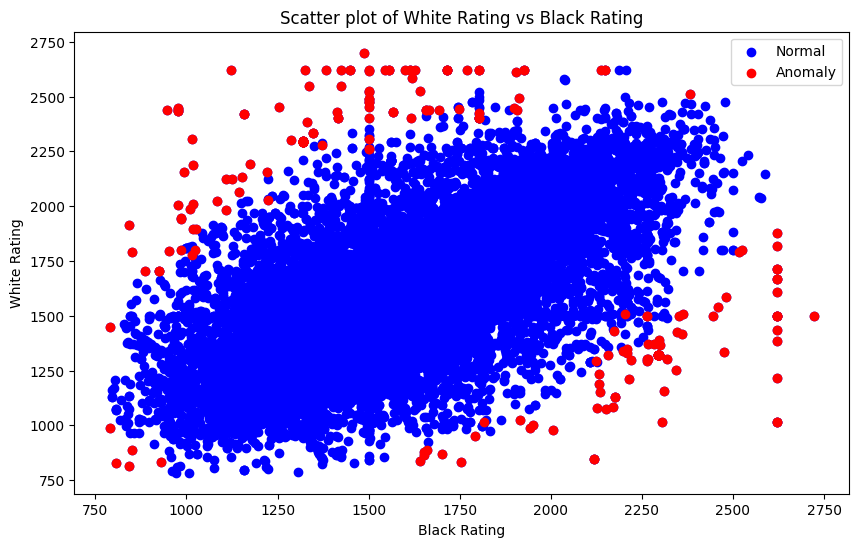

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,performance,anomaly
39,G5S21pXK,False,1.500000e+12,1.500000e+12,34,resign,white,30+30,rajuppi,2449,shivangithegenius,978,c4 e5 Nc3 Bc5 g3 Nc6 Bg2 Nf6 Nf3 b6 Nxe5 Bb7 N...,A21,English Opening: King's English Variation | R...,3,1471,-1
43,oqoT4DLS,False,1.500000e+12,1.500000e+12,66,resign,white,40+40,rajuppi,2443,shivangithegenius,978,e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 Be3 Bg7 f...,B76,Sicilian Defense: Dragon Variation | Yugoslav...,17,1465,-1
48,tLnhk43J,False,1.500000e+12,1.500000e+12,35,mate,white,40+40,rajuppi,2436,shivangithegenius,978,e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 Be3 Bg7 f...,B77,Sicilian Defense: Dragon Variation | Yugoslav...,17,1458,-1
49,iq3Kz06t,False,1.500000e+12,1.500000e+12,41,mate,white,40+40,rajuppi,2436,shivangithegenius,978,e4 d5 exd5 Qxd5 Qf3 Qe5+ Ne2 Nf6 d4 Qd5 Qxd5 N...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4,1458,-1
121,XPZikam7,True,1.500000e+12,1.500000e+12,59,mate,white,10+0,cdvh,1706,dashy1,925,d4 d5 Nf3 Nf6 Bf4 Nc6 e3 Bf5 Bb5 e6 Ne5 Bb4+ c...,D02,Queen's Pawn Game: London System,5,781,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19235,NPyFrVPh,False,1.504450e+12,1.504450e+12,22,resign,white,30+30,rajuppi,2454,grsa,1254,Nf3 d5 e3 Nf6 b3 Nc6 Bb5 a6 Bxc6+ bxc6 Bb2 Bf5...,A06,Reti Opening,2,1200,-1
19326,AbL4qbvl,True,1.500820e+12,1.500820e+12,38,outoftime,black,10+0,kanchanfromindia,846,laode_syahril,2119,Nf3 Nc6 g3 e5 Bg2 Qe7 O-O d6 Nc3 Nf6 d4 h6 dxe...,A04,Zukertort Opening: Black Mustang Defense,2,1273,-1
19611,oK51C1ur,False,1.502660e+12,1.502660e+12,54,resign,black,30+30,mamaduck,1334,sparklehorse,2475,d4 e6 c4 b6 Nc3 Bb7 a3 g6 e4 Bg7 Nf3 d6 Be2 Nd...,A40,English Defense,4,1141,-1
19614,M3lOLm8y,False,1.501690e+12,1.501690e+12,57,resign,white,10+2,le_truand,2549,mamaduck,1337,e4 e5 Nf3 Nc6 d4 d6 dxe5 Bg4 exd6 cxd6 Nc3 Nge...,C44,Scotch Game,5,1212,-1


In [23]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('chess_data.csv')

# Define a function to calculate performance
def calculate_performance(row):
    if row['winner'] == 'white':
        return row['white_rating'] - row['black_rating']
    else:
        return row['black_rating'] - row['white_rating']

# Apply the function to the dataframe
df['performance'] = df.apply(calculate_performance, axis=1)

# Select the features
features = ['white_rating', 'black_rating', 'performance']

# Fit the model
model = IsolationForest(contamination=0.01)
model.fit(df[features])

# Predict the anomalies in the data
df['anomaly'] = model.predict(df[features])

# Filter out the anomalies
anomalies = df[df['anomaly'] == -1]
anomalies_df = df[df['anomaly'] == -1][features]

plt.figure(figsize=(10, 6))
plt.scatter(df['black_rating'], df['white_rating'], color='blue', label='Normal')
plt.scatter(anomalies_df['black_rating'], anomalies_df['white_rating'], color='red', label='Anomaly')
plt.xlabel('Black Rating')
plt.ylabel('White Rating')
plt.title('Scatter plot of White Rating vs Black Rating')
plt.legend()
plt.show()
anomalies

# importing powerful Chess Engine: STOCKFISH

Stockfish is a free and open-source chess engine¹²³. It's considered one of the strongest chess engines available to the public². Here are some key points about Stockfish:

- It was based on a chess engine created by Tord Romstad in 2004, which was further developed by Marco Costalba in 2008².
- Stockfish is available for various desktop and mobile platforms and can be used in chess software through the Universal Chess Interface³.
- It has won more than 10 Top Chess Engine Championships and has consistently ranked highly on rating lists¹².
- The engine is developed by an entire community and its source code is openly available, meaning you can read the code, modify it, and contribute back¹.
- As of June 2023, Stockfish is the highest-rated engine according to the computer chess rating list (CCRL), with a rating of approximately 3530².

In essence, Stockfish is a powerful tool that can analyze chess games and provide world-class chess analysis¹. It's widely used by chess enthusiasts and professionals alike to study games and improve their skills². Please note that there's also a type of unsalted, dried fish called Stockfish⁴, but in the context of your question, we're referring to the chess engine.



In [67]:
from stockfish import Stockfish
#https://github.com/zhelyabuzhsky/stockfish/blob/master/stockfish/models.py
stockfish = Stockfish("C:/Users/hp/Downloads/stockfish-windows-x86-64-sse41-popcnt/stockfish/stockfish-windows-x86-64-sse41-popcnt.exe")
stockfish.set_depth(20)#How deep the AI looks
stockfish.set_skill_level(20)#Highest rank stockfish
stockfish.get_parameters()

{'Debug Log File': '',
 'Contempt': 0,
 'Min Split Depth': 0,
 'Ponder': 'false',
 'MultiPV': 1,
 'Skill Level': 20,
 'Move Overhead': 10,
 'Minimum Thinking Time': 20,
 'Slow Mover': 100,
 'UCI_Chess960': 'false',
 'UCI_LimitStrength': 'false',
 'UCI_Elo': 1350,
 'Threads': 1,
 'Hash': 16}

# finding Blunder moves and their best moves using STOCKFISH

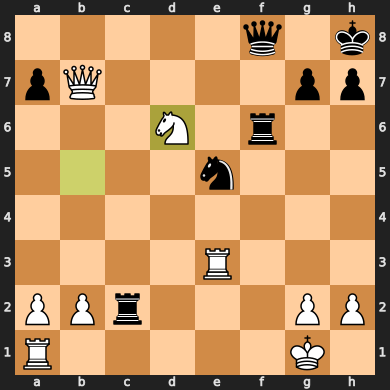

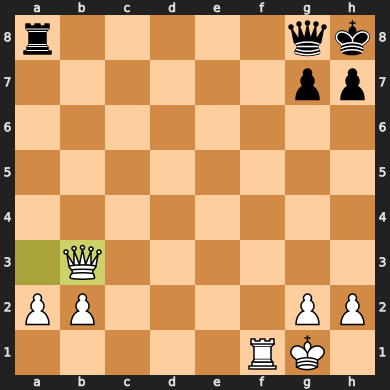

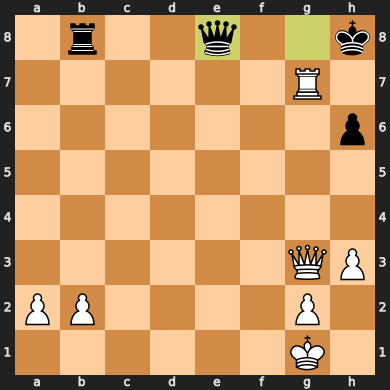

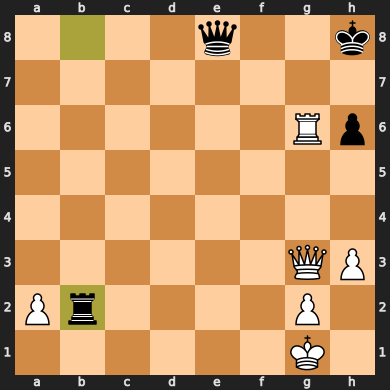

Blunder by white at move 49: Nxd6. Best move was: c2f2.
Blunder by white at move 65: Qb3. Best move was: g8b3.
Blunder by black at move 78: Qe8. Best move was: g7a7.
Blunder by black at move 80: Rxb2. Best move was: g3c3.


In [53]:
from stockfish import Stockfish
import chess
import chess.svg
from IPython.display import SVG, display

def find_blunders_and_best_moves(game_id, df):
    # Initialize Stockfish
    stockfish = Stockfish("C:/Users/hp/Downloads/stockfish-windows-x86-64-sse41-popcnt/stockfish/stockfish-windows-x86-64-sse41-popcnt.exe")
    stockfish.set_depth(16)
    stockfish.set_skill_level(16)

    # Get the game data
    game_data = df[df['id'] == game_id].iloc[0]

    # Get the moves
    moves = game_data['moves'].split(" ")

    # Initialize a chess board
    board = chess.Board()

    # Initialize a list to store the blunders and best moves
    blunders_and_best_moves = []

    # Iterate over the moves
    for i, move in enumerate(moves):
        # Get the evaluation score before the move
        stockfish.set_fen_position(board.fen())
        evaluation_before = stockfish.get_evaluation()['value']

        # Make the move on the board
        board.push_san(move)

        # Get the evaluation score after the move
        stockfish.set_fen_position(board.fen())
        evaluation_after = stockfish.get_evaluation()['value']

        # If the evaluation score decreases significantly, it's a blunder
        if evaluation_before - evaluation_after > 100:  # Adjust the threshold as needed
            # Get the best move according to Stockfish
            best_move = stockfish.get_best_move()

            # Add the blunder and the best move to the list
            blunders_and_best_moves.append((i, move, best_move))

            display(board)

    return blunders_and_best_moves

# Example usage (assuming you have a DataFrame 'df' loaded)
# Load the data
df = pd.read_csv('chess_data.csv')
game_id = 'TZJHLljE'
blunders_and_best_moves = find_blunders_and_best_moves(game_id, df)
for i, move, best_move in blunders_and_best_moves:
    player = 'white' if i % 2 == 0 else 'black'
    print(f'Blunder by {player} at move {i+1}: {move}. Best move was: {best_move}.')


# Finding Accuracy of both players of a given match

In [3]:
from stockfish import Stockfish
import pandas as pd
import chess

def calculate_accuracy(game_id, df):
    # Initialize Stockfish
    stockfish = Stockfish("C:/Users/hp/Downloads/stockfish-windows-x86-64-sse41-popcnt/stockfish/stockfish-windows-x86-64-sse41-popcnt.exe")
    stockfish.set_depth(20)
    stockfish.set_skill_level(20)

    # Get the game data
    game_data = df[df['id'] == game_id].iloc[0]

    # Get the moves
    moves = game_data['moves'].split()

    # Initialize a chess board
    board = chess.Board()

    # Initialize counters for the number of accurate moves
    accurate_moves_white = 0
    accurate_moves_black = 0

    # Iterate over the moves
    for i, move in enumerate(moves):
        # Get the best move according to Stockfish
        stockfish.set_fen_position(board.fen())
        best_move = stockfish.get_best_move()

        # Get the evaluation score of the best move
        board.push_san(best_move)
        stockfish.set_fen_position(board.fen())
        best_evaluation = stockfish.get_evaluation()['value']
        board.pop()

        # Make the actual move on the board
        board.push_san(move)

        # Get the evaluation score after the actual move
        stockfish.set_fen_position(board.fen())
        actual_evaluation = stockfish.get_evaluation()['value']

        # If the evaluation difference is very small, it's an accurate move
        if abs(best_evaluation - actual_evaluation) < 50:  # Adjust the threshold as needed
            if i % 2 == 0:
                accurate_moves_white += 1
            else:
                accurate_moves_black += 1

    # Calculate the accuracy for each player
    total_moves_white = len(moves) // 2 + len(moves) % 2
    total_moves_black = len(moves) // 2
    accuracy_white = accurate_moves_white / total_moves_white * 100 if total_moves_white > 0 else 0
    accuracy_black = accurate_moves_black / total_moves_black * 100 if total_moves_black > 0 else 0
    return accuracy_white, accuracy_black

# Example usage (assuming you have a DataFrame 'df' loaded)
game_id = 'TZJHLljE'
df = pd.read_csv('chess_data.csv')
accuracy_white, accuracy_black = calculate_accuracy(game_id, df)
print(f'Accuracy for white player: {accuracy_white}%')
print(f'Accuracy for black player: {accuracy_black}%')


Accuracy for white player: 85.36585365853658%
Accuracy for black player: 77.5%


# Importing Second dataset for more Analysis

In [87]:
df = pd.read_csv('chess_data2.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_9712\2819807168.py:1: DtypeWarning: Columns (19,20,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,243,244,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('chess_data2.csv')


In [88]:
df.columns

Index(['Index', 'Index.1', 'Black', 'BlackElo', 'BlackRatingDiff', 'Date',
       'ECO', 'Event', 'Opening', 'Result',
       ...
       'Clock_ply_193', 'Clock_ply_194', 'Clock_ply_195', 'Clock_ply_196',
       'Clock_ply_197', 'Clock_ply_198', 'Clock_ply_199', 'Clock_ply_200',
       'Category', 'Weekday'],
      dtype='object', length=623)

# Reducing columns by merging

In [5]:

# Combine the 'Move_ply' columns
df['Moves'] = df[[col for col in df.columns if 'Move_ply' in col]].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Combine the 'Eval_ply' columns
df['Evals'] = df[[col for col in df.columns if 'Eval_ply' in col]].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Combine the 'Clock_ply' columns
df['Clocks'] = df[[col for col in df.columns if 'Clock_ply' in col]].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Drop the original 'Move_ply', 'Eval_ply', and 'Clock_ply' columns
df = df.drop([col for col in df.columns if 'Move_ply' in col or 'Eval_ply' in col or 'Clock_ply' in col], axis=1)

# Display the DataFrame
df.head()


,Index,Index.1,Black,BlackElo,BlackRatingDiff,Date,ECO,Event,Opening,Result,...,White,WhiteElo,WhiteRatingDiff,BlackTitle,WhiteTitle,Category,Weekday,Moves,Evals,Clocks
0,0,124,albertoPlasta,906,13.0,2019.04.30,B15,Rated Blitz game,Caro-Kann Defense,0-1,...,KingMateo,971,-12.0,NaN,NaN,Blitz,Tuesday,d4 d5 Nc3 c6 e4 h5 exd5 cxd5 Qf3 Bg4 Qf4 e6 Bb...,0.25 0.15 -0.15 0.47 0.13 0.72 0.66 0.51 0.0 1...,0:05:00 0:05:00 0:04:55 0:04:57 0:04:46 0:04:4...
1,1,494,Luckystriker,1296,28.0,2019.04.30,C50,Rated Blitz game,Italian Game,0-1,...,G_i_n,1312,-10.0,NaN,NaN,Blitz,Tuesday,e4 e5 Nf3 Nc6 Bc4 d6 Nc3 h6 d4 exd4 Nxd4 Nf6 N...,0.12 0.37 0.23 0.15 0.21 0.46 0.36 0.38 0.48 0...,0:05:00 0:05:00 0:04:59 0:04:59 0:04:59 0:04:5...
2,2,552,Verascardoso,1761,-13.0,2019.04.30,C41,Rated Rapid game,Philidor Defense #2,1-0,...,bufone,1653,27.0,NaN,NaN,Rapid,Tuesday,e4 e5 Nf3 d6 c3 Be7 d4 exd4 cxd4 Nf6 Bd3 h6 O-...,0.12 0.37 0.23 0.59 0.16 0.64 0.47 0.8 0.94 0....,0:10:00 0:10:00 0:09:52 0:09:59 0:09:41 0:09:5...
3,3,588,Stockfish94,2404,8.0,2019.04.30,B06,Rated Bullet game,Modern Defense,0-1,...,bcn000,2324,-8.0,NaN,FM,Bullet,Tuesday,e4 g6 d4 h6 Nc3 Bg7 Nge2 e6 f3 Ne7 Be3 O-O Qd2...,0.12 0.46 0.28 0.9 0.69 0.97 0.91 0.94 0.85 0....,0:01:00 0:01:00 0:00:59 0:01:00 0:00:59 0:01:0...
4,4,725,deneme12376,1595,-10.0,2019.04.30,B32,Rated Blitz game,Sicilian Defense: Loewenthal Variation,1-0,...,alcool50,1614,29.0,NaN,NaN,Blitz,Tuesday,e4 c5 Nf3 Nc6 d4 cxd4 Nxd4 e5 Nb5 a6 Nd6+ Bxd6...,0.12 0.2 0.21 0.08 0.15 0.22 0.08 0.37 0.25 0....,0:03:00 0:03:00 0:02:59 0:03:00 0:02:58 0:02:5...


In [91]:
df.columns

Index(['Index', 'Index.1', 'Black', 'BlackElo', 'BlackRatingDiff', 'Date',
       'ECO', 'Event', 'Opening', 'Result', 'Round', 'Site', 'Termination',
       'TimeControl', 'UTCDate', 'UTCTime', 'White', 'WhiteElo',
       'WhiteRatingDiff', 'BlackTitle', 'WhiteTitle', 'Category', 'Weekday',
       'Moves', 'Evals', 'Clocks'],
      dtype='object')

# Finding Probablity of Knight to jump on a particular square

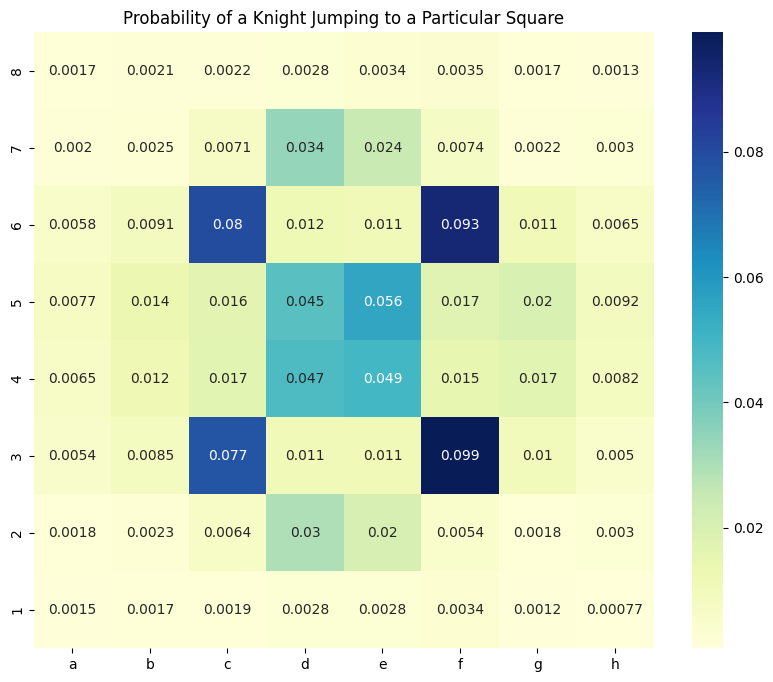

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# Initialize a 8x8 matrix to represent the chess board
board = np.zeros((8, 8))

# Define a function to convert algebraic notation to board coordinates
def notation_to_coordinates(move):
    # Remove the '+' sign if the move is a check
    if '+' in move:
        move = move.replace('+', '')
    if '#' in move:
        move = move.replace('#', '')

    # Check if the move is a capture
    if 'x' in move:
        # If the move is a capture, the destination square is after the 'x'
        square = move.split('x')[1]
    else:
        # If the move is not a capture, the destination square is the move itself
        square = move

    # Check if the move is disambiguated by file or rank
    if len(square) == 3:
        # Disambiguated by both file and rank
        file = ord(square[1]) - ord('a')
        rank = 8 - int(square[2])
    elif square[0].isdigit():
        # Disambiguated by rank
        file = ord(square[1]) - ord('a')
        rank = 8 - int(square[2])
    elif square[0].isalpha():
        # Disambiguated by file
        file = ord(square[0]) - ord('a')
        rank = 8 - int(square[1])
    else:
        print(f'Invalid move: {move}')
        return None, None
    return file, rank


# Iterate over the 'Moves' column
for moves in df['Moves']:
    # Split the moves by space
    moves = moves.split()
    # Filter out the knight moves (those that start with 'N')
    knight_moves = [move for move in moves if move[0] == 'N']
    # Convert the moves to board coordinates and increment the corresponding board cell
    for move in knight_moves:
        file, rank = notation_to_coordinates(move[1:])
        if file is not None and rank is not None:
            board[rank, file] += 1


# Check if any knight moves were found
if np.sum(board) == 0:
    print('No knight moves found.')
else:
    # Normalize the board to get probabilities
    total_moves = np.sum(board)
    board = board / total_moves

    # Create a heatmap
    plt.figure(figsize=(10, 8))
sns.heatmap(board, annot=True, cmap='YlGnBu', 
            xticklabels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], 
            yticklabels=[8, 7, 6, 5, 4, 3, 2, 1])
plt.title('Probability of a Knight Jumping to a Particular Square')
plt.show()


# Finding Probablity of Bishop to jump on a particular square

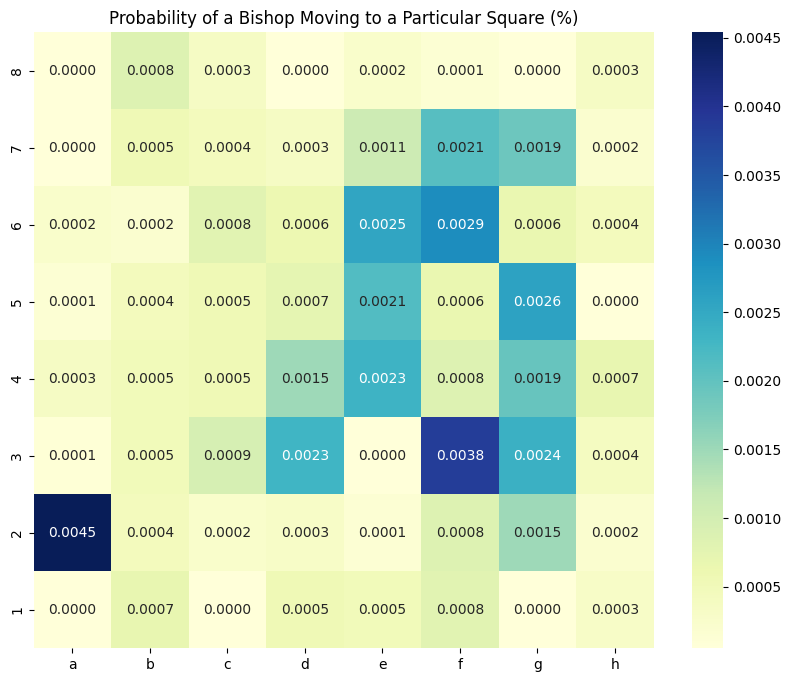

In [121]:
# Initialize a 8x8 matrix to represent the chess board
board_bishop = np.zeros((8, 8))

# Initialize a counter for the destination squares
dest_squares_bishop = Counter()

# Iterate over the 'Moves' column
for moves in df['Moves']:
    # Split the moves by space
    moves = moves.split()
    # Filter out the bishop moves (those that start with 'B')
    bishop_moves = [move for move in moves if move.startswith('B')]
    # Extract the destination squares and update the counter
    for move in bishop_moves:
        dest_square = move[1:]  # Remove the 'B'
        dest_squares_bishop[dest_square] += 1

# Convert the counter to probabilities
# Convert the counter to probabilities and multiply by 100 to get percentages
total_moves_bishop = sum(dest_squares_bishop.values())
for square, count in dest_squares_bishop.items():
    file, rank = notation_to_coordinates(square)
    if file is not None and rank is not None:
        board_bishop[rank, file] = (count / total_moves_bishop) * 100

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(board_bishop, annot=True, cmap='YlGnBu', 
            xticklabels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], 
            yticklabels=[8, 7, 6, 5, 4, 3, 2, 1], 
            fmt=".4f")
plt.title('Probability of a Bishop Moving to a Particular Square (%)')
plt.show()



# Finding most popular Event type

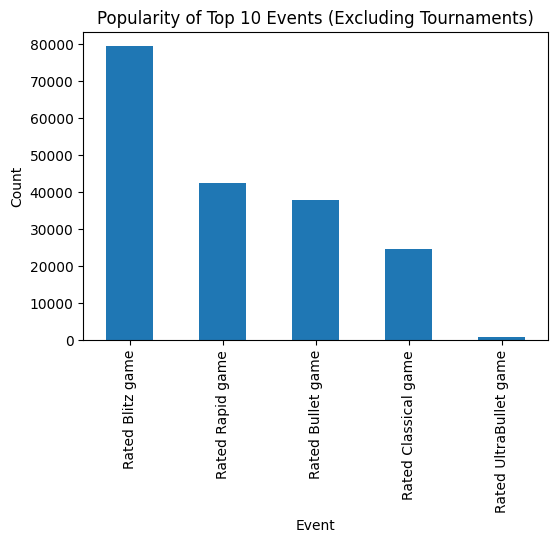

In [142]:
# Filter out events that contain 'tournament'
df_filtered = df[~df['Event'].str.contains('tournament', case=False)]

# Count the occurrences of each event
event_counts = df_filtered['Event'].value_counts()

# Get the top 10 events
top_10_events = event_counts

# Plot a bar graph
plt.figure(figsize=(6, 4))
top_10_events.plot(kind='bar')
plt.title('Popularity of Top 10 Events (Excluding Tournaments)')
plt.xlabel('Event')
plt.ylabel('Count')
plt.show()


# Finding total count of TITLE HOLDERS

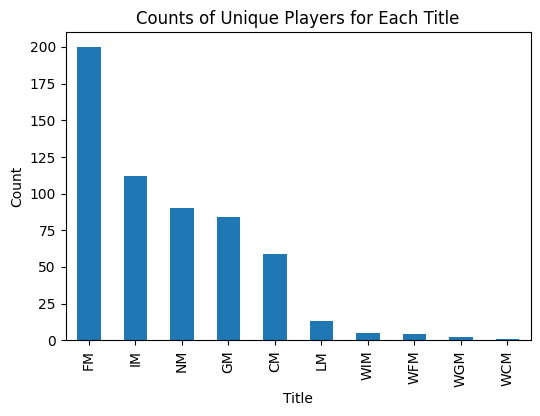

In [143]:
# Create a new DataFrame for black players
df_black = df[['Black', 'BlackTitle']].copy()
df_black.columns = ['Player', 'Title']

# Create a new DataFrame for white players
df_white = df[['White', 'WhiteTitle']].copy()
df_white.columns = ['Player', 'Title']

# Concatenate the two DataFrames
df_combined = pd.concat([df_black, df_white])

# Drop duplicates
df_combined = df_combined.drop_duplicates()

# Count the unique titles for each player
player_title_counts = df_combined['Title'].value_counts()

# Plot a bar graph
player_title_counts.plot(kind='bar', figsize=(6, 4))
plt.title('Counts of Unique Players for Each Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.show()


# Optimizing the Blunder finding Mechanism

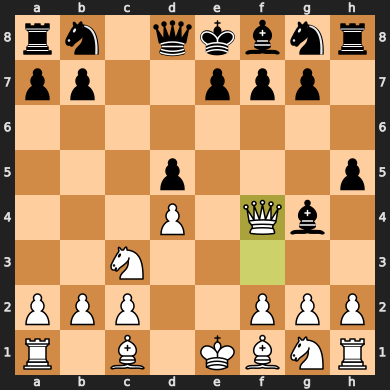

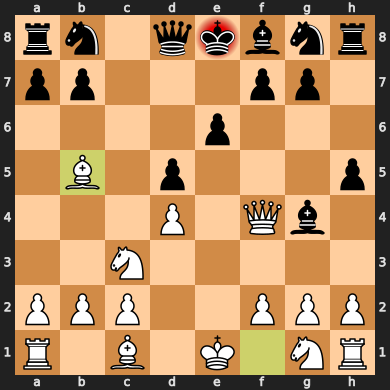

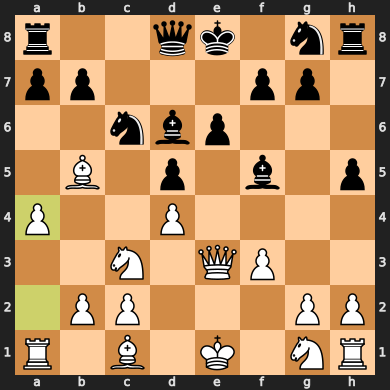

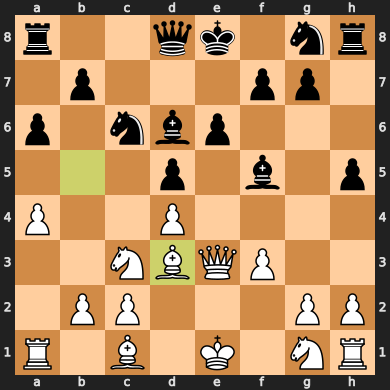

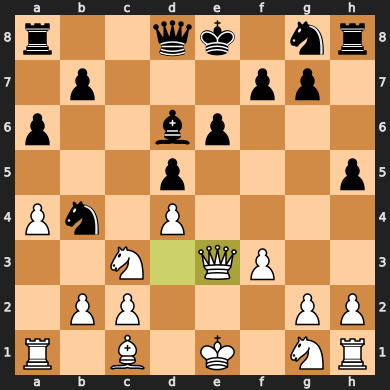

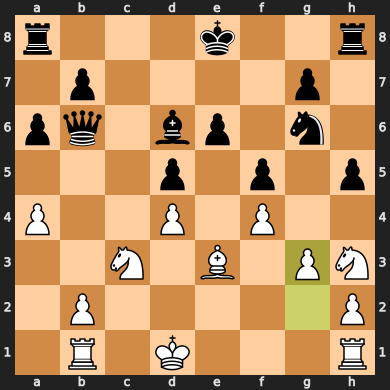

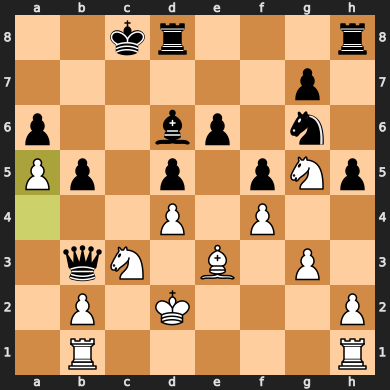

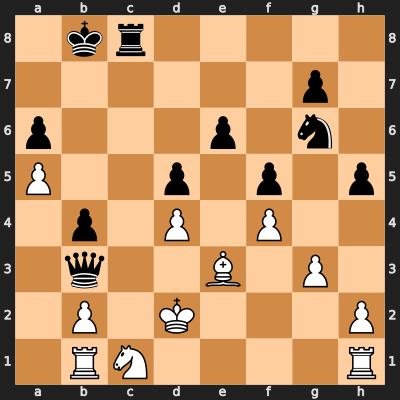

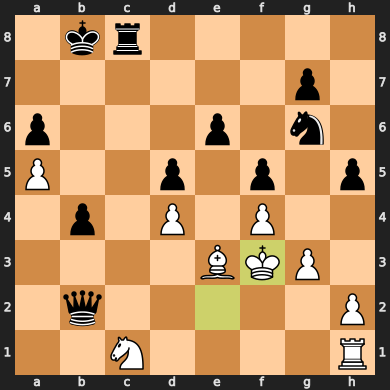

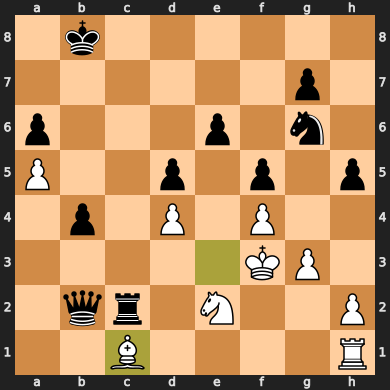

['Qf4', 'Bb5+', 'a4', 'Bd3', 'Qe3', 'g3', 'a5', 'Nc1', 'Kf3', 'Bc1']


In [24]:
import chess
import numpy as np
import chess.svg
from IPython.display import SVG, display

def find_blunders(game_index, evals_drop_threshold=1.0):
    # Get the game data
    game_data = df.loc[game_index]

    # Get the evaluations data and convert it to a list of floats if it's a string
    evals = game_data['Evals'].split() if isinstance(game_data['Evals'], str) else game_data['Evals']

    # Get the moves data and convert it to a list if it's a string
    moves = game_data['Moves'].split() if isinstance(game_data['Moves'], str) else game_data['Moves']

    # Initialize a list to store the blunder moves
    blunders = []

    # Initialize a variable to store the last checkmate prediction
    last_checkmate_prediction = None

    # Initialize a chess board
    board = chess.Board()

    # Check if evals and moves are lists or similar iterable objects
    if isinstance(evals, (list, np.ndarray, pd.Series)) and isinstance(moves, (list, np.ndarray, pd.Series)):
        # Loop through the evaluations data
        for i in range(len(evals)):
            # Make the move on the chess board
            try:
                board.push_san(moves[i])
            except:
                continue

            # If the evaluation contains a '#', it's a checkmate prediction
            if '#' in evals[i]:
                # Get the sign of the checkmate prediction
                checkmate_prediction = int(evals[i].split('#')[1]) > 0

                # If it's the first checkmate prediction or the sign has changed, it's a blunder
                if last_checkmate_prediction is None or checkmate_prediction != last_checkmate_prediction:
                    blunders.append(moves[i])
                    # Display the chess board
                    display(SVG(chess.svg.board(board=board, size=400)))

                # Update the last checkmate prediction
                last_checkmate_prediction = checkmate_prediction
            else:
                # Calculate the change in evaluation
                try:
                    eval_change = float(evals[i]) - float(evals[i-1])
                except ValueError:
                    continue

                # If the change in evaluation is less than the threshold, it's a blunder
                if eval_change < -evals_drop_threshold:
                    blunders.append(moves[i])
                    # Display the chess board
                    display(board)

    return blunders


print(find_blunders(0))